# Data Analysis and Preprocessing for the Fraud Dataset

Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import logging

Loading the Fraud Dataset

In [2]:
logging.basicConfig(level=logging.INFO)

def safe_read_csv(path: str) -> pd.DataFrame:
    try:
        logging.info(f"Loading data from {path}")
        return pd.read_csv(path)
    except FileNotFoundError:
        logging.error(f"File not found: {path}")
        raise
    except Exception as e:
        logging.error(f"Failed to load data: {e}")
        raise

In [3]:
df = safe_read_csv('/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/raw/Fraud_Data.csv')
df.info()

INFO:root:Loading data from /Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/raw/Fraud_Data.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


#### Dataset Overview

- The dataset consists of 151,112 rows and 11 columns. Among these, 6 columns are categorical (signup_time, purchase_time, device_id, source, browser, sex), 5 columns are numeric (user_id, purchase_value, age, ip_address), and 1 column serves as the target variable.

- The dataset does not contain any missing values, so it is complete and ready for analysis.

In [4]:
# print the first few rows of the dataframe
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0



Loading the IP-Address Dataset

In [5]:
df_ip =safe_read_csv('/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/raw/IpAddress_to_Country.csv')
df_ip.info()

INFO:root:Loading data from /Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/raw/IpAddress_to_Country.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Dataset Overview

- The dataset consists of 138,846 rows and 3 columns. It includes 2 numeric columns (lower_bound_ip_address, upper_bound_ip_address) and 1 categorical column (country), which maps each IP address range to its corresponding country.

In [6]:
# print the first few rows of the dataframe
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## Data Cleaning

#### Removing Duplicate Data

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check the result
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 151112


- The dataset does not contain any duplicate values.

#### Correct Data Types

Correct data types means that each column in the dataset is stored in the most appropriate format for its content:

- Numeric columns (int, float) store numerical values for calculations (e.g., age, purchase_value).

- Categorical columns (object, category) store text labels or categories (e.g., sex, country, browser).

- Datetime columns (datetime64) store date and time values (e.g., signup_time, purchase_time) for easy sorting and feature extraction.

In [8]:
# Convert datetime columns
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Convert categorical columns
categorical_cols = ['device_id', 'source', 'browser', 'sex']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert numeric columns
numeric_cols = ['user_id', 'purchase_value', 'age', 'ip_address', 'class']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

# check the updated dtypes
print(df.dtypes)

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id               category
source                  category
browser                 category
sex                     category
age                        int64
ip_address               float64
class                      int64
dtype: object


## Exploratory Data Analysis (EDA)


In [9]:
# Generate summary statistics
df.describe()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336


The dataset contains 151,112 records with user, purchase, and demographic information. The average purchase value is approximately 36.9, with a minimum of 9 and a maximum of 154, while the average user age is 33 years, ranging from 18 to 76. Users completed purchases between January and December 2015, and the dataset includes a target variable (class) with roughly 9.4% positive cases.

### Univariate Analysis

Numerical Columns

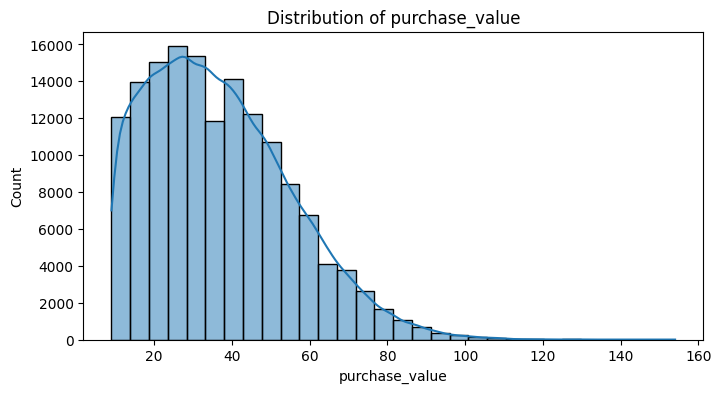

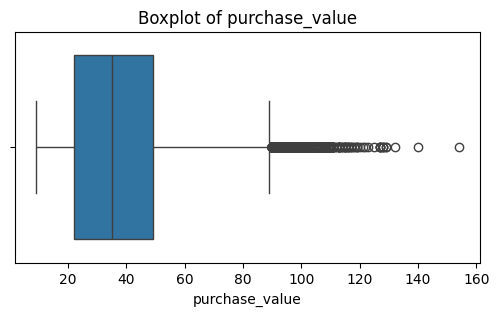

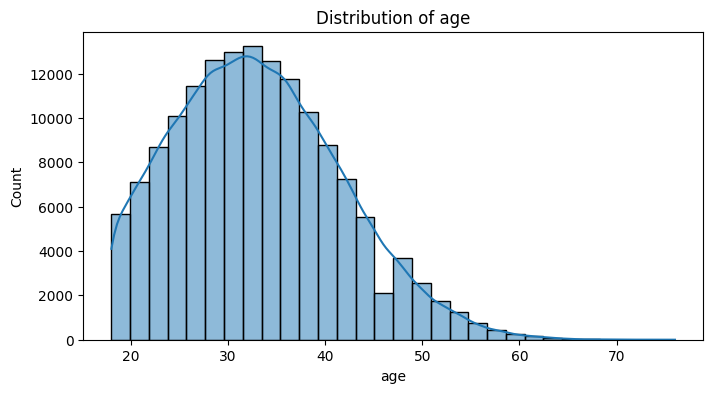

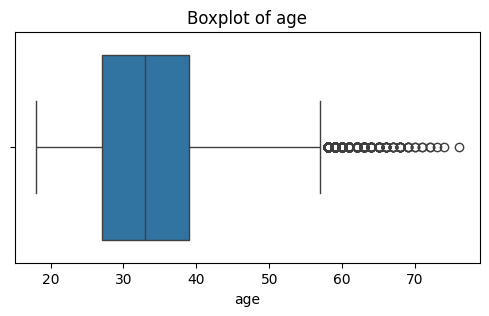

In [10]:
# =========================
# Numeric Columns
# =========================
numeric_cols = ['purchase_value', 'age']

for col in numeric_cols: 
    # Histogram with KDE
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Age
- The distribution is approximately normal (bell-shaped), centered around the 30-35 age range. The vast majority of observations fall between 20 and 45.

Purchase_value
- The distribution is strongly right-skewed, with the peak/mode occurring in the low-value $20-$30 range. There is a long, sparse tail extending to high-value transactions (up to $160), representing potential outliers.

Categorical Columns


=== browser Value Counts ===
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
browser
Chrome     0.406533
IE         0.243045
Safari     0.163237
FireFox    0.162859
Opera      0.024326
Name: proportion, dtype: float64


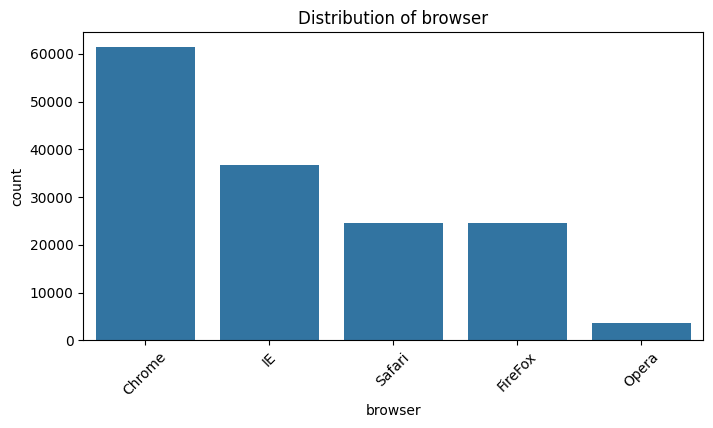


=== sex Value Counts ===
sex
M    88293
F    62819
Name: count, dtype: int64
sex
M    0.584288
F    0.415712
Name: proportion, dtype: float64


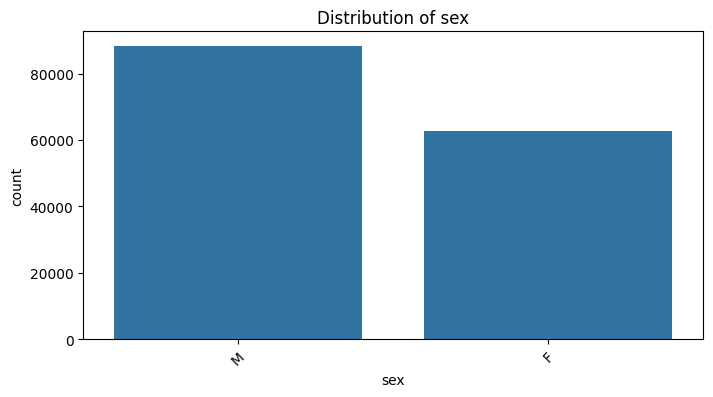


=== source Value Counts ===
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
source
SEO       0.401126
Ads       0.396269
Direct    0.202605
Name: proportion, dtype: float64


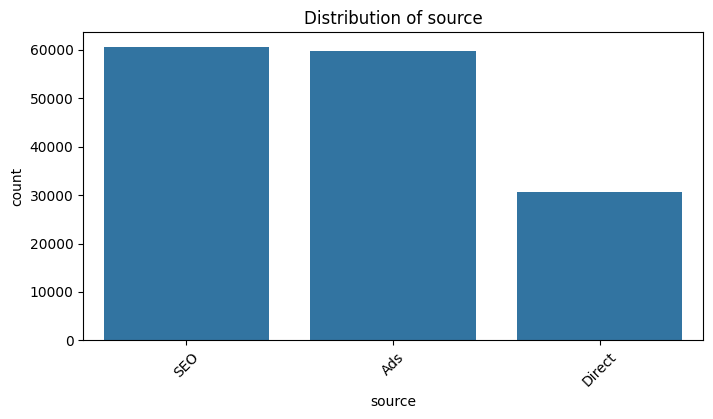

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



=== class Value Counts ===
class
0    136961
1     14151
Name: count, dtype: int64
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


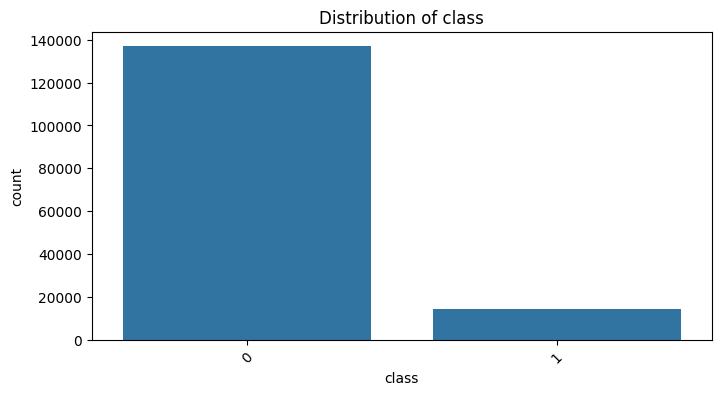

In [11]:
# =========================
# Categorical Columns
# =========================
categorical_cols = ['browser', 'sex', 'source', 'class']

for col in categorical_cols:
    print(f"\n=== {col} Value Counts ===")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))  # percentages
    
    # Countplot
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

- Based on the value counts, Chrome is the most frequently used browser, accounting for over 40% of all transactions in the dataset, followed by IE, Safari, and FireFox, which together make up an additional 57%. The distribution is highly imbalanced, with the Opera browser representing a negligible portion at less than 2.5% of the transactions.

- The dataset exhibits a clear gender imbalance, with male-attributed transactions ($\text{M}$) accounting for approximately 58.4% of the total volume compared to female-attributed transactions ($\text{F}$) at 41.6%. This suggests that male users or activities are significantly more prevalent in the collected data.

- The majority of activity originates from SEO and Ads which are nearly balanced and collectively account for approximately 80% of the transactions. Direct traffic contributes a substantial but smaller portion, making up about 20.3% of the dataset.

- This feature reveals that the dataset is highly imbalanced, which is typical for fraud detection, with the vast majority of records belonging to class 0 (Non-Fraudulent) at 90.6%. The target variable, class 1 (Fraudulent), constitutes a small minority of the data at only 9.4%.

Time-based Univariate Analysis

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


signup_month
1    26978
2    17535
3    19555
4    18895
5    19338
6    18633
7    19454
8    10724
Name: count, dtype: int64


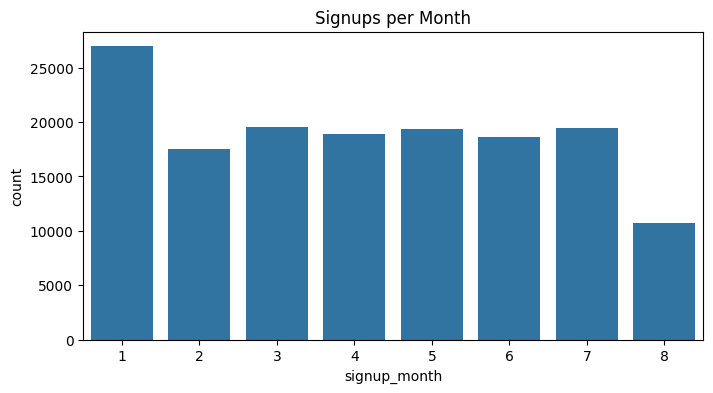

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


purchase_month
1     10097
2      6449
3     12090
4     16551
5     19364
6     18908
7     19507
8     18662
9     14347
10     9815
11     4743
12      579
Name: count, dtype: int64


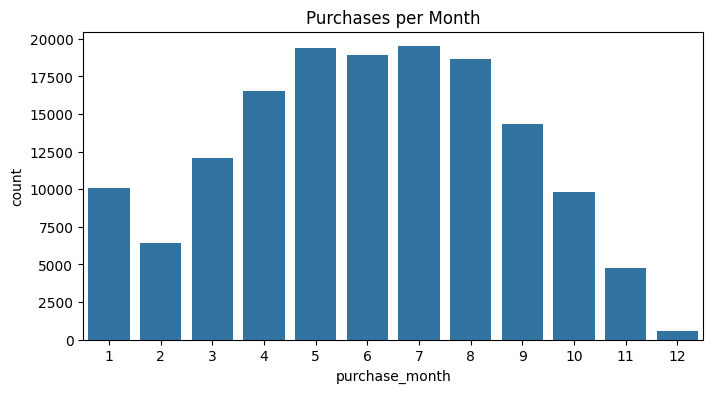

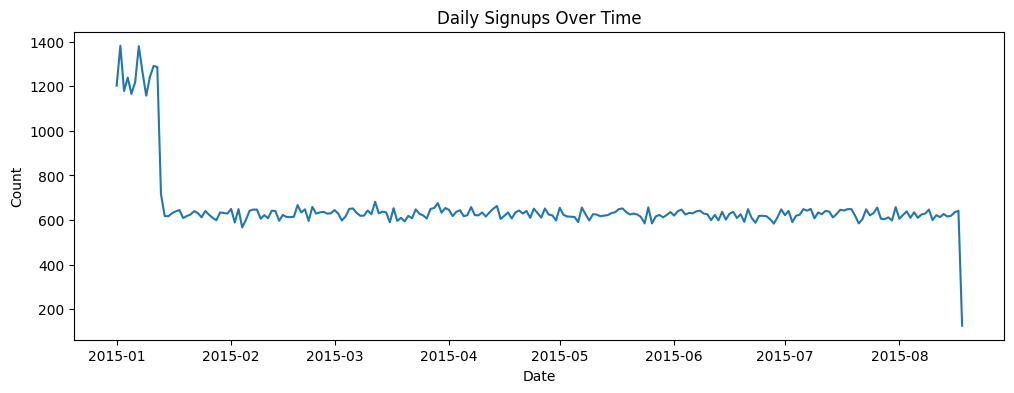

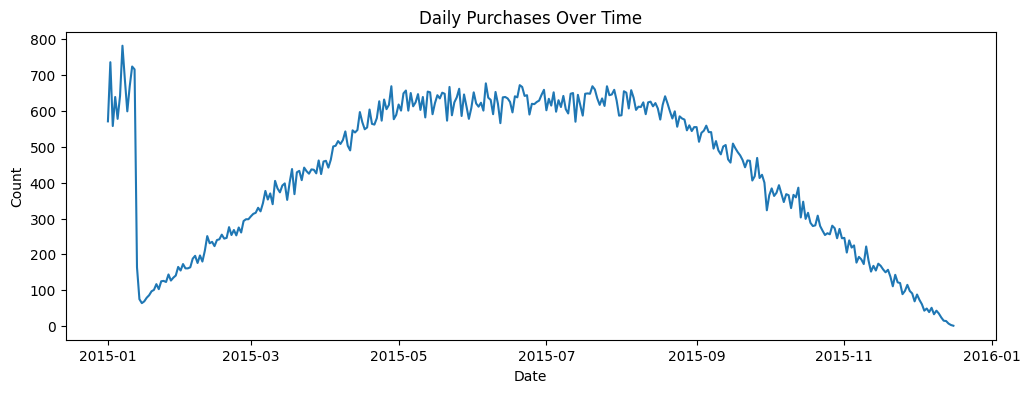

In [12]:
# Extract features
df['signup_month'] = df['signup_time'].dt.month
df['signup_day'] = df['signup_time'].dt.day
df['signup_weekday'] = df['signup_time'].dt.day_name()

df['purchase_month'] = df['purchase_time'].dt.month
df['purchase_day'] = df['purchase_time'].dt.day
df['purchase_weekday'] = df['purchase_time'].dt.day_name()

# Plot signups per month
print(df['signup_month'].value_counts().sort_index())
plt.figure(figsize=(8,4))
sns.countplot(x='signup_month', data=df)
plt.title('Signups per Month')
plt.show()

# Plot purchases per month
print(df['purchase_month'].value_counts().sort_index())
plt.figure(figsize=(8,4))
sns.countplot(x='purchase_month', data=df)
plt.title('Purchases per Month')
plt.show()

# Daily trend of signups
df.groupby(df['signup_time'].dt.date).size().plot(figsize=(12,4))
plt.title('Daily Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# Daily trend of purchases
df.groupby(df['purchase_time'].dt.date).size().plot(figsize=(12,4))
plt.title('Daily Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

- The sign-up activity was highest in January (Month 1, with nearly 27,000 sign-ups), suggesting a strong start to the period or a promotional push. Activity then remained relatively stable from February through July, with a sharp drop in August (Month 8, the last month), which is roughly half the volume of the preceding months.

- Purchase volume shows a clear upward trend, starting low in January and reaching its peak in July (Month 7). The volume remains strong in August, but then declines significantly through the remaining months of the year, with a dramatic drop in December (Month 12). This pattern suggests peak activity in the late spring/early summer.

- Sign-up volume starts very high in early January (peaking near 1,400 daily) and then sharply drops to a consistent baseline of about 600-650 daily sign-ups for the entire period from late January through July. There is a dramatic collapse in activity at the very end of August, suggesting the end of data collection.

- Purchase volume exhibits a clear, bell-shaped seasonal trend over the year. Activity starts low in January, ramps up steadily through spring, plateaus at a high level (around 600-700 daily) from May through August, and then steadily declines through autumn and winter, dropping to almost zero by the end of December.

### Bivariate Analysis 

Numeric Features Vs Target 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


class  purchase_value
0      9                 2098
       10                2041
       11                2215
       12                2249
       13                2337
                         ... 
1      104                  3
       106                  2
       108                  1
       110                  1
       111                  1
Name: count, Length: 220, dtype: int64


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


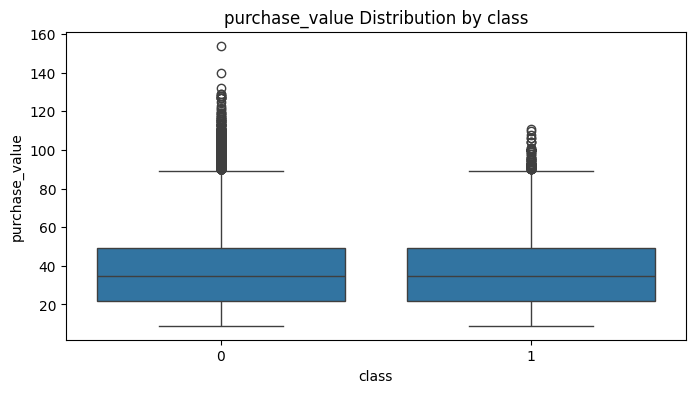

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


class  age
0      18     2492
       19     2664
       20     3059
       21     3446
       22     3715
              ... 
1      63       16
       64        1
       65        1
       66        1
       68        1
Name: count, Length: 108, dtype: int64


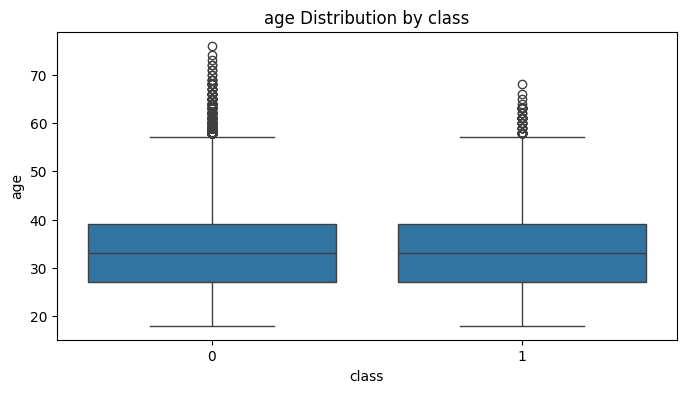

In [13]:
# ---------------------------
# Numeric features vs target
# ---------------------------
target = 'class'

for col in numeric_cols:
    print(df.groupby(target)[col].value_counts().sort_index())
    plt.figure(figsize=(8,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} Distribution by {target}')
    plt.show()

Categorical Features vs Target

class  browser
0      Chrome     55363
       IE         33540
       Safari     22442
       FireFox    22268
       Opera       3348
1      Chrome      6069
       IE          3187
       FireFox     2342
       Safari      2225
       Opera        328
Name: count, dtype: int64


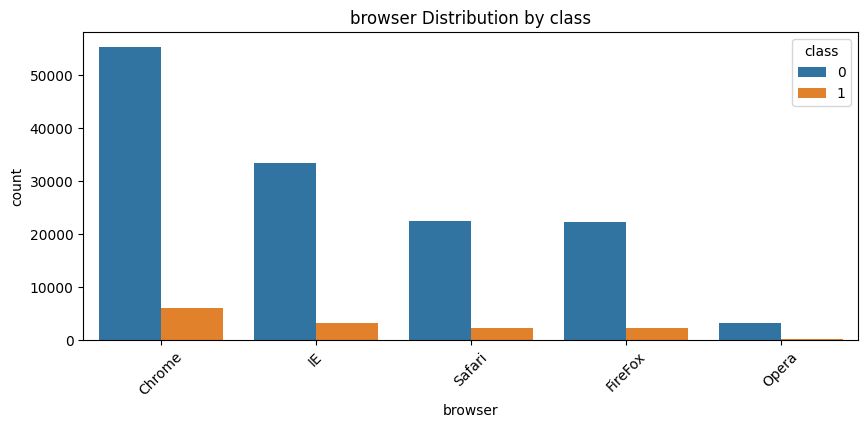

class  sex
0      M      79859
       F      57102
1      M       8434
       F       5717
Name: count, dtype: int64


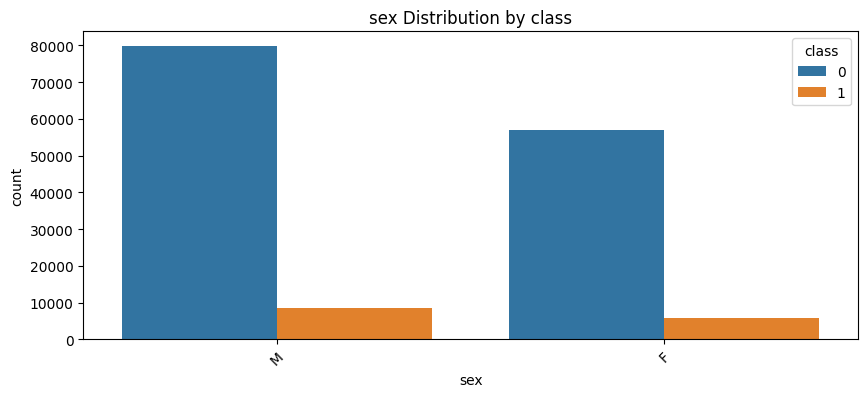

class  source
0      SEO       55203
       Ads       54368
       Direct    27390
1      Ads        5513
       SEO        5412
       Direct     3226
Name: count, dtype: int64


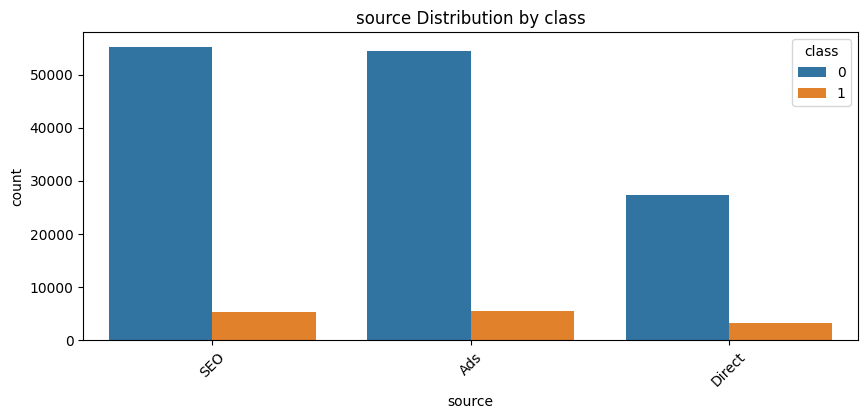

In [14]:
# ---------------------------
# Categorical features vs target
# ---------------------------
categorical_cols = ['browser', 'sex', 'source']
for col in categorical_cols:
    print(df.groupby(target)[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue=target, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution by {target}')
    plt.xticks(rotation=45)
    plt.show()

- While Chrome accounts for the highest raw count of fraudulent transactions, the fraud risk is relatively stable across all major browsers. There is no strong indication that fraudsters favor a specific browser disproportionately to its overall usage in the dataset.

- The dataset contains more fraudulent transactions attributed to the male ($\text{M}$) category both in raw count and as a slightly higher percentage of their total transactions. This indicates a marginally elevated fraud risk associated with male-attributed activity compared to female-attributed activity.

- Transactions originating from Direct traffic exhibit the highest rate of fraud, suggesting that unreferred or manually entered access poses a greater risk. In contrast, SEO and Ads traffic are similarly less risky sources, despite having the highest raw transaction volumes. 

### Class Distribution Analysis

In [15]:
# Count of each class
class_counts = df['class'].value_counts()
print(class_counts)


class
0    136961
1     14151
Name: count, dtype: int64


In [16]:
# Percentage of each class
class_percent = df['class'].value_counts(normalize=True) * 100
print(class_percent)

class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


In [17]:
# Calculate and print imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio (non-fraud : fraud) = {imbalance_ratio:.2f} : 1")

Imbalance ratio (non-fraud : fraud) = 9.68 : 1


- The dataset is highly imbalanced, with the vast majority of records belonging to the non-fraudulent class ($\text{class}=0$) at approximately 90.6% of the total count. Consequently, the fraudulent class ($\text{class}=1$) represents a small minority of the data, accounting for just 9.4% of all observations.

## Geolocation Integration

Convert IP columns to integers

In [18]:
df['ip_int'] = df['ip_address'].astype(int)
df_ip['lower_bound_ip_address'] = df_ip['lower_bound_ip_address'].astype(int)
df_ip['upper_bound_ip_address'] = df_ip['upper_bound_ip_address'].astype(int)

Perform range-based lookup

In [19]:
# Sort both dataframes by IP
df = df.sort_values('ip_int')
df_ip = df_ip.sort_values('lower_bound_ip_address')

# Perform merge_asof (closest lower bound match)
merged_df = pd.merge_asof(df, df_ip,
                          left_on='ip_int',
                          right_on='lower_bound_ip_address',
                          direction='backward')

# Keep only rows where ip_int <= upper_bound_ip_address
merged_df = merged_df[merged_df['ip_int'] <= merged_df['upper_bound_ip_address']]

# Check result
print(merged_df[['ip_address', 'ip_int', 'country']].head())


       ip_address    ip_int    country
634  1.677886e+07  16778864  Australia
635  1.684205e+07  16842045   Thailand
636  1.684366e+07  16843656      China
637  1.693873e+07  16938732      China
638  1.697198e+07  16971984   Thailand


Count frauds per country

In [20]:
# Total frauds per country
fraud_by_country = merged_df[merged_df['class'] == 1]['country'].value_counts().sort_values(ascending=False).head(10)
print(fraud_by_country)


country
United States        5551
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Italy                 166
Name: count, dtype: int64


- The United States is overwhelmingly the primary source of fraudulent transactions, accounting for 5,551 instances, which is more than five times the volume of the next highest country. The remaining countries, led by China (1,043) and Japan (715), show a rapid and significant drop-off in the raw count of fraudulent activity, with the total number of instances for the 10th country, Italy, falling to just 166.

Count no_frauds per country

In [21]:
# Total no frauds per country
no_fraud_by_country = merged_df[merged_df['class'] == 0]['country'].value_counts().sort_values(ascending=False).head(10)
print(no_fraud_by_country)

country
United States        52498
China                10995
Japan                 6591
United Kingdom        4013
Korea Republic of     3782
Germany               3384
France                2861
Brazil                2691
Canada                2627
Italy                 1778
Name: count, dtype: int64


- The list confirms that the United States overwhelmingly dominates the non-fraudulent transaction volume by a large margin (52,498 transactions), consistent with its high raw fraud count. Following the US, China and Japan are the next largest sources of legitimate activity, with volumes of 10,995 and 6,591 transactions, respectively, maintaining a similar high-volume pattern as observed in the fraud counts.

Fraud proportion per country

In [22]:
# Total transactions per country
total_by_country = merged_df['country'].value_counts()

# Fraud rate per country (%)
fraud_rate_by_country = (fraud_by_country / total_by_country * 100).sort_values(ascending=False)

# Show top 10 countries by fraud rate
fraud_rate_top10 = fraud_rate_by_country.head(10)
print(fraud_rate_top10)

country
Canada               11.697479
United Kingdom       10.623608
Japan                 9.786477
United States         9.562611
France                9.490668
Korea Republic of     9.130226
Brazil                9.118541
China                 8.664230
Italy                 8.539095
Germany               7.185957
Name: count, dtype: float64


No_fraud proportion per country

In [23]:
# Total transactions per country
total_by_country = merged_df['country'].value_counts()

# Fraud rate per country (%)
no_fraud_rate_by_country = (no_fraud_by_country / total_by_country * 100).sort_values(ascending=False)

# Show top 10 countries by fraud rate
no_fraud_rate_top10 = no_fraud_rate_by_country.head(10)
print(no_fraud_rate_top10)

country
Germany              92.814043
Italy                91.460905
China                91.335770
Brazil               90.881459
Korea Republic of    90.869774
France               90.509332
United States        90.437389
Japan                90.213523
United Kingdom       89.376392
Canada               88.302521
Name: count, dtype: float64


Visualize fraud count per country

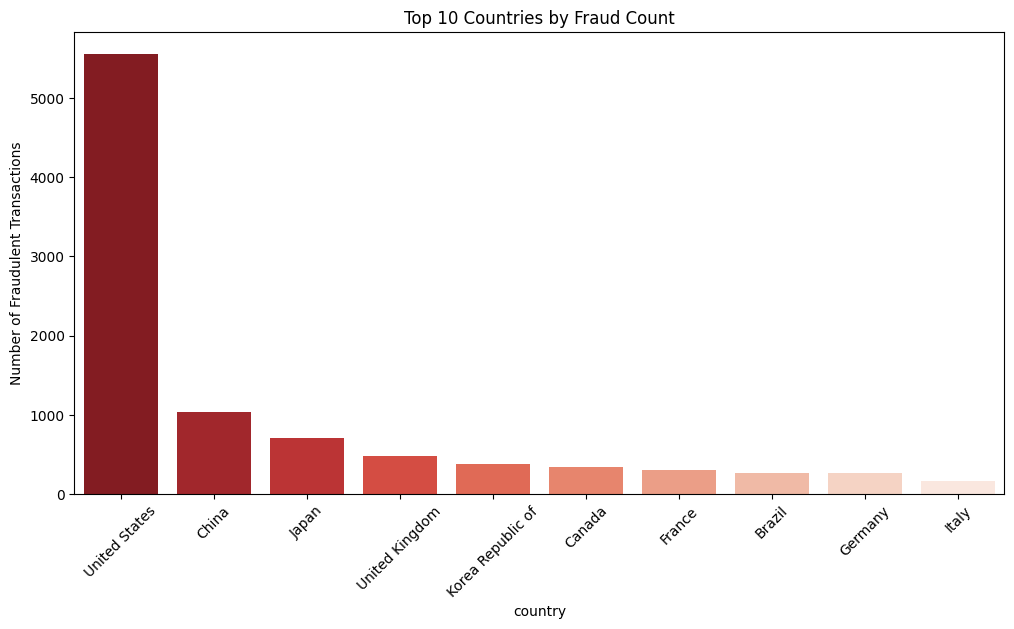

In [24]:
# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=fraud_by_country.index, y=fraud_by_country.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Top 10 Countries by Fraud Count')
plt.show()

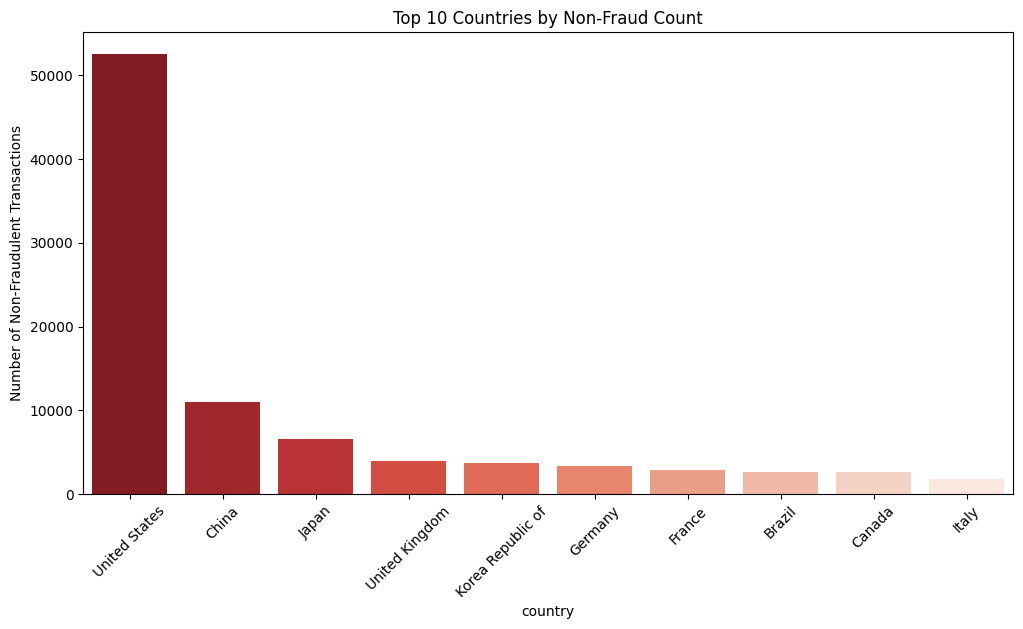

In [25]:
# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=no_fraud_by_country.index, y=no_fraud_by_country.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.title('Top 10 Countries by Non-Fraud Count')
plt.show()

Key Findings:

1. Highest Risk Countries: Although the United States has the highest raw volume of fraud, Canada and the United Kingdom show the highest proportional risk, with fraud rates of $11.7\%$ and $10.62\%$ respectively.

2. Lowest Risk Country: Germany has the lowest fraud rate among these top 10 countries, at $7.19\%$.

## Feature Engineering for Fraud Dataset

Transaction frequency / velocity
- Count number of transactions per user in a given time window (e.g., per day).

In [26]:
# Make sure timestamps are datetime
merged_df['signup_time'] = pd.to_datetime(merged_df['signup_time'])
merged_df['purchase_time'] = pd.to_datetime(merged_df['purchase_time'])

In [27]:
# Transaction frequency
merged_df['transactions_per_user'] = merged_df.groupby('user_id')['user_id'].transform('count')

# Transactions per user per day
merged_df['purchase_date'] = merged_df['purchase_time'].dt.date
merged_df['transactions_per_user_per_day'] = merged_df.groupby(['user_id', 'purchase_date'])['user_id'].transform('count')


Time-based features

In [28]:
# Hour of the day
merged_df['hour_of_day'] = merged_df['purchase_time'].dt.hour

# Day of the week
merged_df['day_of_week'] = merged_df['purchase_time'].dt.day_name()

Time since signup

In [29]:
merged_df['time_since_signup'] = (merged_df['purchase_time'] - merged_df['signup_time']).dt.total_seconds()


time_since_signup is in seconds, can also convert to hours or days

In [30]:
merged_df['time_since_signup_hours'] = merged_df['time_since_signup'] / 3600
merged_df['time_since_signup_days'] = merged_df['time_since_signup'] / (3600*24)


Checking the new features

In [31]:
print(merged_df[['user_id','transactions_per_user','transactions_per_user_per_day',
                'hour_of_day','day_of_week','time_since_signup_days']].head())


     user_id  transactions_per_user  transactions_per_user_per_day  \
634   247547                      1                              1   
635   220737                      1                              1   
636   390400                      1                              1   
637    69592                      1                              1   
638   174987                      1                              1   

     hour_of_day day_of_week  time_since_signup_days  
634            3      Sunday               42.039525  
635           20   Wednesday               14.255058  
636           23    Saturday               23.119606  
637           16    Saturday               88.436308  
638            4     Tuesday              118.629387  


## Data Transformation

Identify numeric and categorical features

In [32]:
# Example features
numeric_features = ['purchase_value', 'age', 'transactions_per_user', 
                    'transactions_per_user_per_day', 'hour_of_day', 'time_since_signup_days']

categorical_features = ['browser', 'source', 'sex', 'day_of_week', 'country']


Create transformers
- Scale numeric features (StandardScaler or MinMaxScaler)
- Encode categorical features (One-Hot Encoding)

In [33]:
# Numeric scaler (Standardization)
numeric_transformer = StandardScaler()

# Categorical encoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [35]:
# Select feature columns
X = merged_df[numeric_features + categorical_features]

# Transform features
X_transformed = preprocessor.fit_transform(X)

print("Transformed feature shape:", X_transformed.shape)


Transformed feature shape: (129146, 204)


- To prepare the dataset for modeling, a focused series of data transformations were executed on the original data shape of $(151112, 11)$. All numerical features were precisely standardized using the StandardScaler, transforming them to have a mean of 0 and a standard deviation of 1. Concurrently, all categorical features were converted into a numerical format using One-Hot Encoding; this process significantly expanded the feature space by creating a new binary column for every unique category value. The result of these combined transformations is a sparse, high-dimensional feature matrix with a shape of $(129146, 204)$, ready for machine learning model training.

## Handle Class Imbalance

In [36]:
# Count the number of transactions in each class
class_counts = merged_df['class'].value_counts()
print("Class distribution before resampling:")
print(class_counts)

Class distribution before resampling:
class
0    116878
1     12268
Name: count, dtype: int64


In [37]:
# Separate features and target
X = X_transformed  # features from the transformation step
y = merged_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_res.value_counts())


Class distribution after SMOTE:
class
0    93502
1    74801
Name: count, dtype: int64


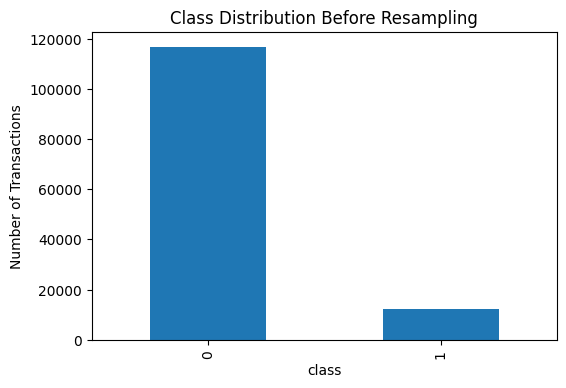

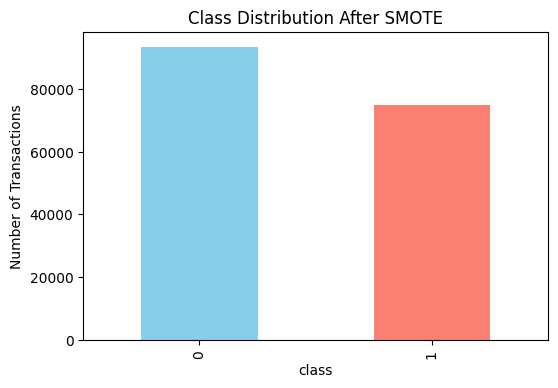

In [39]:
# Before SMOTE 
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title("Class Distribution Before Resampling")
plt.ylabel("Number of Transactions")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
y_train_res.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Class Distribution After SMOTE")
plt.ylabel("Number of Transactions")
plt.show()


- To address the severe class imbalance (9.5% fraud cases), the Synthetic Minority Over-sampling Technique (SMOTE) was applied exclusively to the training data. Undersampling was intentionally avoided because it involves randomly removing a significant portion of the majority non-fraud class (class=0), which would lead to a substantial loss of valuable information about legitimate user behavior. SMOTE was chosen to generate synthetic fraud examples, helping the model learn complex fraud patterns without information loss. Using a sampling_strategy=0.8, SMOTE successfully transformed the original class=0/class=1 ratio of 116,878 to 12,268 into a much more balanced post-resampling ratio of 93,502 non-fraud instances to 74,801 fraud instances.

## 📝 Key Analysis & Preparation Insights

- Temporal Peaks: Daily sign-up volume was extremely high in early January before settling to a stable baseline, while daily purchases show a strong seasonal trend peaking from May through August.

- Source Risk: Direct traffic is the highest-risk source, showing the highest fraud rate (approx. $11.8\%$) compared to SEO and Ads, which have lower fraud rates but higher raw transaction volumes.

- Country Risk: While the United States leads in raw fraud count, Canada and the United Kingdom exhibit the highest proportional risk with fraud rates exceeding $10\%$, making them top priorities for risk monitoring.

- Feature Engineering: Critical features were added, including transaction velocity (number of transactions per user in short time windows) and time_since_signup, to capture behavioral and tenure-related fraud signals.

- Imbalance Handling: The severe class imbalance (9.5% fraud) was mitigated using SMOTE oversampling on the training data, avoiding the information loss associated with undersampling.

- Data Transformation: Numerical features were standardized using StandardScaler, and categorical features were converted using One-Hot Encoding, resulting in a final feature matrix shape of $\mathbf{(129146, 204)}$ ready for model training.